
# Frontmatter
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/) is a link to the source code for this perceptron blog post.

# Intro under Construction.
In this blog post I am going to discuss kernel logistic regression for binary classification. 




# Implementation 
# Under Construction.

In [31]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, let's import some libraries.

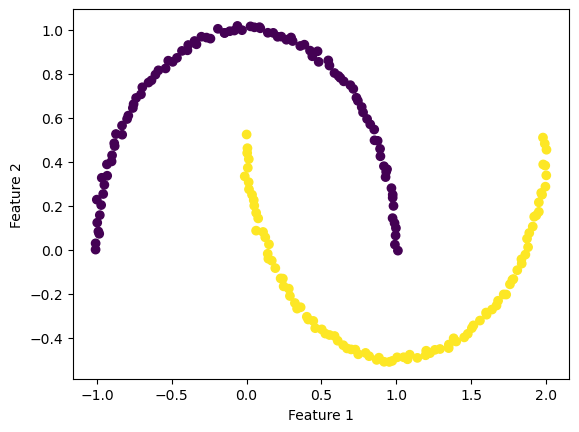

In [32]:

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(42)
np.seterr(all="ignore")


X, y = make_moons(200, shuffle = True, noise = 0.01)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")

[0 0 1 0 1 1]


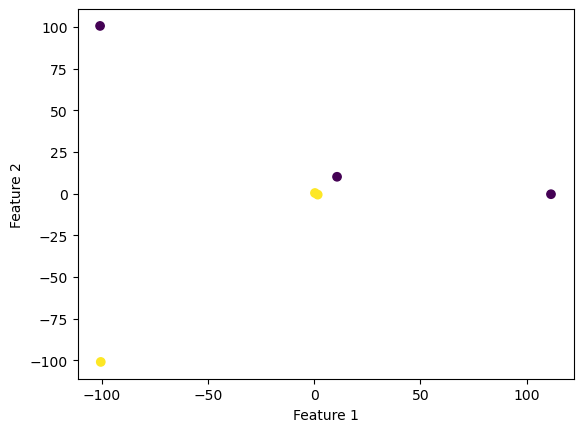

In [33]:
XX = np.array([
[-100.84739307, 100.71154296],
 [ 111.46814927, -0.28580296],
 [ -100.5192833,   -100.94984582],
 [ 10.73327397,  10.17310931],
 [ 0.33197143,  0.43375035],
 [ 1.62726102, -0.54736954]
])
yy = np.array([0, 0, 1, 0, 1, 1])
print(yy)
plt.scatter(XX[:,0], XX[:,1], c = yy)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")

In [34]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
# LR = LogisticRegression()
# LR.fit(X, y)
# plot_decision_regions(X, y, clf = LR)
# title = plt.gca().set(title = f"Accuracy = {(LR.predict(X) == y).mean()}",
#                       xlabel = "Feature 1", 
#                       ylabel = "Feature 2")

We work on nonlinear patterns

### $$ \hat{w} = \arg \min_{w} L(w) $$

In [35]:
from sklearn.metrics.pairwise import rbf_kernel
from kernel_logistic import KLR 


KLR = KLR(rbf_kernel )
KLR.fit(XX, yy)



In [36]:
print(XX)

[[-100.84739307  100.71154296]
 [ 111.46814927   -0.28580296]
 [-100.5192833  -100.94984582]
 [  10.73327397   10.17310931]
 [   0.33197143    0.43375035]
 [   1.62726102   -0.54736954]]


# under construction

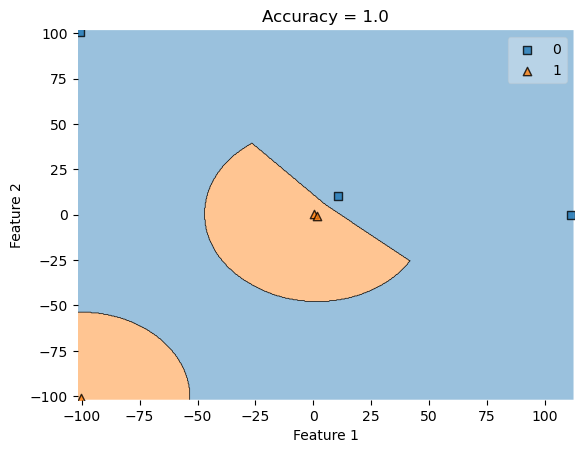

In [37]:
plot_decision_regions(XX, yy, clf = KLR)
mypredict = KLR.predict(XX)
title = plt.gca().set(title = f"Accuracy = {(mypredict == yy).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

In [38]:
print(KLR.predict(XX))
print("OMG")
print(yy)

[0 0 1 0 1 1]
OMG
[0 0 1 0 1 1]


# try on a bigger example

[0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 1 0]
OMG
[1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1
 0 1 1 1 0 1]


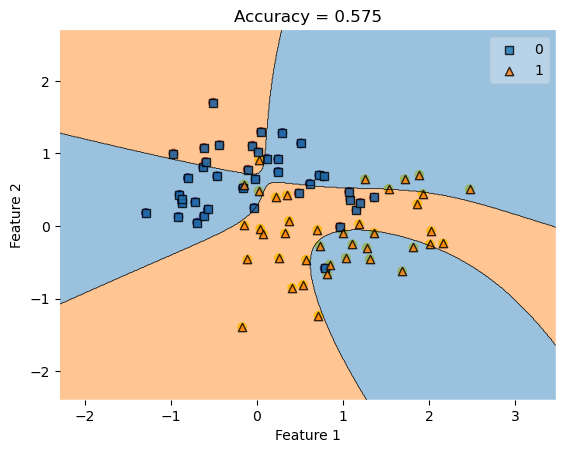

In [50]:

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(123)
np.seterr(all="ignore")

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

X, y = make_moons(80, shuffle = True, noise = 0.3)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")

KLR.fit(X, y)


plot_decision_regions(X, y, clf = KLR)
yourpredict = KLR.predict(X)
title = plt.gca().set(title = f"Accuracy = {(yourpredict == y).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

print(KLR.predict(X))
print("OMG")
print(y)

In [40]:
print(KLR.v)

[ -622.23496279  1335.13521946   681.20950851 -1284.34485486
  -525.72085209   333.19420805]
